#### 자연어 처리
- 데이터 수집
- 정제 및 토큰화
- 불용어, 구두점 제거
- 단어 사전 => 토큰: 숫자 형식으로 맵핑 진행
- 데이터 수치화

[1] 모듈 로딩, 데이터 준비<hr>

In [530]:
# 모듈 로딩
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize


In [531]:
# 데이터 준비
TEXT_FILE= '../data/corpus_data.txt'

In [532]:
# 데이터 추출
with open(TEXT_FILE, 'rt', encoding='utf-8') as f: #기본모드값='rt'
    data1=f.read(100)       #size=> byte단위, 오버하면 걍 끝까지 가져옴       
    f.seek(0)               #읽은 시작 위치를 정할 수 있음
    data= f.read(400000) 

In [533]:
len(data1), len(data)

(100, 42053)

In [534]:
# 줄 단위로 읽기 
# readline()
with open(TEXT_FILE, 'rt', encoding='utf-8') as f: #기본모드값='rt'
    all_data=[]
    while True:                         #다 읽으려면 반복문 필요

        data= f.readline() 
        if not data: 
            break
        else:
            all_data.append(data)

In [535]:
data, len(all_data)

('', 149)

In [536]:
# 라인 단위로 전체 읽기
# readlines()
with open(TEXT_FILE, 'rt', encoding='utf-8') as f:
    data=f.readlines()

In [537]:
len(data)

149

[2] 데이터 전처리 <hr>

In [538]:
[print(d) for d in data] #줄바꿈 문자, 기호 등등 처리 필요

"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).



The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]

The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.



Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offering a reward for information. In 1866, a 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

- 줄바꿈 문자 처리

In [539]:
# sdfsadfasf\n ,\n, 등 처리하기
all_data=[]
for d in data[::-1]:
    d=d.replace('\n','')  
    if len(d): all_data.append(d)

len(all_data)

87

- 대소문자 통일


In [540]:
# 소괄호 (for ~ in )
# -> 제너레이터로 생성됨 (많은 데이터 처리 시 메모리 아낄 수 있음)
all_text= (text.lower() for text in all_data)

In [541]:
# for _ in all_text:
#     print(_)

- 토큰화 

In [542]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [543]:
len(all_tokens)

87

- 불용어, 구두점 제거

In [544]:
from nltk.corpus import stopwords
import string

In [545]:
# 불용어 추출
eng_stopwords= stopwords.words('english')
pun=list(string.punctuation)


In [546]:
# 불용어, 구두점, 짧은 토큰 삭제
for token in all_tokens:
    for t in token[::-1]:
        if t.isnumeric(): 
            token.remove(t)
        elif (t in eng_stopwords) or (t in pun) or (len(t)<=2):
            token.remove(t)

In [547]:
len(all_tokens)#, all_tokens

87

- 단어별 빈도수 측정


In [548]:
from collections import Counter

# 빈도수 저장
token_freqs={}
for token in all_tokens:
    for t in token:
        if t not in token_freqs:
            token_freqs[t]=1        #키값이 없으면 넣기+증가
        else:
            token_freqs[t]+=1       #없으면 숫자만 증가

In [549]:
token_freqs.items()

dict_items([('woodruff', 5), ('submits', 1), ('legal', 12), ('verdicts', 1), ('although', 14), ('fair', 3), ('given', 5), ('evidence', 12), ('courts', 4), ('fully', 1), ('resolved', 1), ('great', 2), ('doubt', 2), ('cockburn', 10), ('admitted', 1), ('hung', 1), ('case', 23), ('wrote', 4), ('probably', 1), ('ever', 2), ('key', 2), ('long', 5), ('since', 4), ('lost', 7), ('...', 2), ('mystery', 2), ('remains', 2), ('".[', 11), ('article', 1), ('catholic', 4), ('herald', 1), ('suggested', 3), ('dna', 1), ('profiling', 1), ('might', 6), ('resolve', 1), ('enigma', 1), ('launched', 4), ('numerous', 2), ('retellings', 1), ('story', 4), ('book', 1), ('film', 4), ('including', 9), ('short', 2), ('tom', 1), ('castro', 15), ('implausible', 1), ('imposter', 1), ('jorge', 1), ('luis', 1), ('borges', 1), ('universal', 1), ('history', 4), ('infamy', 1), ('david', 1), ('yates', 1), ('tichborne', 97), ('claimant', 115), ('thus', 5), ('concludes', 1), ('man', 4), ('still', 1), ('walks', 1), ('name', 14)

In [550]:
# 빈도별로 체크
# {v:k for k, v in token_freqs.items()} #1번만 나온 단어 1개만 남고 사라짐
freqsDict={}
for k, v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[k]
    else:
        freqsDict[v].append(k)
# 1번만 나온 단어 어떻게 처리할지는 선택택

In [551]:
sorted(freqsDict.items(), reverse=True)

[(115, ['claimant']),
 (97, ['tichborne']),
 (62, ['roger']),
 (41, ['orton']),
 (32, ['family']),
 (23, ['case', 'sir']),
 (22, ['arthur', 'kenealy']),
 (19, ['lady']),
 (18, ['years', 'court', 'son']),
 (16, ['trial']),
 (15, ['castro']),
 (14, ['although', 'name', 'wagga']),
 (13, ['australia', 'england', 'would', 'doughty', 'may', 'one']),
 (12, ['legal', 'evidence']),
 (11,
  ['".[',
   'henry',
   'james',
   'edward',
   'witnesses',
   'former',
   'information',
   'london']),
 (10, ['cockburn', 'accepted', 'support', 'bogle', 'civil']),
 (9, ['including', 'died', 'john', 'ship']),
 (8,
  ['identity',
   'could',
   'details',
   'supporters',
   'first',
   'later',
   'two',
   'became',
   'hawkins',
   'wapping',
   'ballantine',
   'thomas']),
 (7,
  ['lost',
   'made',
   'onslow',
   'mary',
   'daughter',
   'william',
   'sydney',
   'remained',
   'found',
   'april',
   'much',
   'katherine',
   'called',
   'bella',
   'june',
   'many',
   'examination',
   'park

[3] 단어집합/단어사전 생성
- 단어: 숫자 맵핑
- 나의 데이터셋을 숫자로 변환하기 위한 인코딩 표
- 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩
    - 패딩에 사용되는 토큰 'PAD':0
- 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전/집합에 존재하지 않는 단어
    - 존재하지 않는 토큰 'oov', 'unk':1'

    

In [552]:
# 빈도순으로 단어 정렬
sTokens=sorted(token_freqs.items(), key=lambda x: x[1], reverse=True)

In [553]:
# 단어사전 생성 및 초기화
# PAD, UNK or OOV -> 특수토큰
vocab={'PAD':0, 'OOV':1}

In [554]:
# 코퍼스에서 추출한 토큰(단어)들
for idx, t in enumerate(sTokens, 2):
    vocab[t[0]]=idx


In [555]:
vocab

{'PAD': 0,
 'OOV': 1,
 'claimant': 2,
 'tichborne': 3,
 'roger': 4,
 'orton': 5,
 'family': 6,
 'case': 7,
 'sir': 8,
 'arthur': 9,
 'kenealy': 10,
 'lady': 11,
 'years': 12,
 'court': 13,
 'son': 14,
 'trial': 15,
 'castro': 16,
 'although': 17,
 'name': 18,
 'wagga': 19,
 'australia': 20,
 'england': 21,
 'would': 22,
 'doughty': 23,
 'may': 24,
 'one': 25,
 'legal': 26,
 'evidence': 27,
 '".[': 28,
 'henry': 29,
 'james': 30,
 'edward': 31,
 'witnesses': 32,
 'former': 33,
 'information': 34,
 'london': 35,
 'cockburn': 36,
 'accepted': 37,
 'support': 38,
 'bogle': 39,
 'civil': 40,
 'including': 41,
 'died': 42,
 'john': 43,
 'ship': 44,
 'identity': 45,
 'could': 46,
 'details': 47,
 'supporters': 48,
 'first': 49,
 'later': 50,
 'two': 51,
 'became': 52,
 'hawkins': 53,
 'wapping': 54,
 'ballantine': 55,
 'thomas': 56,
 'lost': 57,
 'made': 58,
 'onslow': 59,
 'mary': 60,
 'daughter': 61,
 'william': 62,
 'sydney': 63,
 'remained': 64,
 'found': 65,
 'april': 66,
 'much': 67,
 '

In [558]:
# 텍스트 문장 ==> 수치화 (인코딩)
encData=[]
for token in all_tokens:
    # 1개 문장 인코딩
    sent=[]
    print(f'문장: {token}')
    for t in token:
        sent.append(vocab[t])
    print(f'인코딩: {sent}\n')
    encData.append(sent)        #저장

문장: ['woodruff', 'submits', 'legal', 'verdicts', 'although', 'fair', 'given', 'evidence', 'courts', 'fully', 'resolved', 'great', 'doubt', 'cockburn', 'admitted', 'hung', 'case', 'woodruff', 'wrote', 'probably', 'ever', 'key', 'long', 'since', 'lost', '...', 'mystery', 'remains', '".[', 'article', 'catholic', 'herald', 'suggested', 'dna', 'profiling', 'might', 'resolve', 'mystery', 'enigma', 'launched', 'numerous', 'retellings', 'story', 'book', 'film', 'including', 'short', 'story', 'tom', 'castro', 'implausible', 'imposter', 'jorge', 'luis', 'borges', 'universal', 'history', 'infamy', 'david', 'yates', 'film', 'tichborne', 'claimant', 'thus', 'woodruff', 'concludes', 'man', 'lost', 'still', 'walks', 'history', 'name', 'common', 'voice', 'day', 'accorded', 'claimant', '".[']
인코딩: [92, 611, 26, 612, 17, 215, 93, 27, 135, 613, 614, 328, 329, 36, 615, 616, 7, 92, 136, 617, 330, 331, 94, 137, 57, 332, 333, 334, 28, 618, 138, 619, 216, 620, 621, 76, 622, 333, 623, 139, 335, 624, 140, 625, 

In [561]:
# 문장 길이 통일 
# 1. 최장 문장 길이를 기준으로 통일
max([len(sent) for sent in encData]),min([len(sent) for sent in encData])

(143, 1)

[4] 패딩
- 길이가 다른 문장들의 길이를 맞추기
    - 가장 긴문장 기준으로 나머지 문장들은 PAD로 채우기
    - 개발자 지정 길이를 기준으로 길이를 조절 (평균,중앙값 등등)
        - 지정 길이보다 긴 경우: 자르기 (앞 or 뒤)
        - 지정 길이보다 짧은 경우: 채우기(PAD)

In [562]:
import matplotlib.pyplot as plt

(array([37.,  2.,  1.,  2.,  3.,  5., 15.,  4.,  6.,  4.,  2.,  3.,  1.,
         0.,  2.]),
 array([  1.        ,  10.46666667,  19.93333333,  29.4       ,
         38.86666667,  48.33333333,  57.8       ,  67.26666667,
         76.73333333,  86.2       ,  95.66666667, 105.13333333,
        114.6       , 124.06666667, 133.53333333, 143.        ]),
 <BarContainer object of 15 artists>)

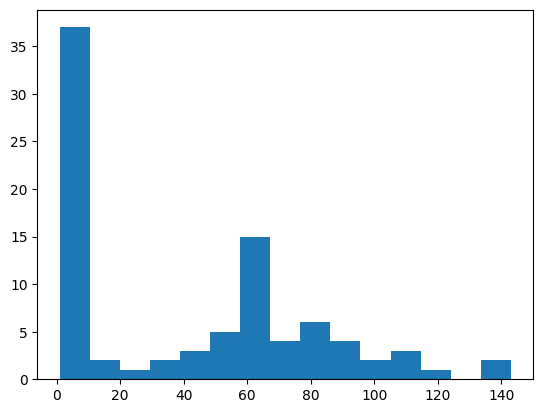

In [572]:
# 길이 정하기 위해 분포 시각화
dataLen= [len(sent) for sent in encData]
plt.hist(dataLen,bins=15)


In [576]:
# 기준길이
MAX_LENGTH=max(dataLen)

In [583]:
# [1] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encData):
    cur_len=len(sent)
    if len(sent)<MAX_LENGTH:
        # print(sent, [0]*(MAX_LENGTH- len(sent)))
        encData[idx]=sent+([0]*(MAX_LENGTH- cur_len))

In [586]:
for t in encData:
    print(len(t))

143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143
143


In [ ]:
# 기준길이
MAX_LENGTH=100
for idx, sent in enumerate(encData):
    cur_len=len(sent)
    if cur_len<MAX_LENGTH:  #채우기는 동일
        encData[idx]=sent+([0]*(MAX_LENGTH- cur_len))
    else:       #자를 경우 앞 or 뒤 선택후 자르기
        encData[idx]=sent[:MAX_LENGTH] #뒤
        encData[idx]=sent[cur_len-MAX_LENGTH:]#앞